### 0 Datos

In [1]:
from scipy.io import loadmat #Función que permite leer archivos .mat
import numpy as np #Paquete que incluye equivalentes a matlab
# En particular numpy.linalg tiene funciones eig y svd
import matplotlib.pyplot as plt #Paquete para graficar

#Python es orientado a objetos y los objetos pueden guardar variables y métodos (funciones)
#Estos se llaman con el syntax objeto.método() u objeto.variable
#Esto también aplica a listas, arrays, diccionarios y strings entre otras estructuras

In [2]:
#Cargamos los datos a un diccionario "data"
data = loadmat('Data/data_prueba_5.mat')
#El diccionario guarda varias varibles asociadas a llaves que se llaman con el formato
#data[llave]. Por ejemplo data['t'] tiene el tiempo mientras que los datos
#están guardados como data['antag_fijo_comun'] y similares.
#Primero imprimimos una lista de las llaves para saber con que trabajamos.
#Las llaves con nombres __así__ guardan metadatos y no nos interesan.
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 't', 'antag_fijo_comun', 'antag_fijo_nuevo', 'antag_random_comun', 'antag_random_nuevo'])


In [3]:
#Luego guardamos los nombres en una lista para hacer trabajar sobre todos los datos más fácil
nombres = ['antag_fijo_comun','antag_fijo_nuevo', 
                 'antag_random_comun', 'antag_random_nuevo']
#Podemos además ver algunas descripciones simples de los datos
for llave in nombres + ['t']:
    print('Datos: %s' % llave)
    print('Dimensiones: %s\n' % str(data[llave].shape))

Datos: antag_fijo_comun
Dimensiones: (63, 101)

Datos: antag_fijo_nuevo
Dimensiones: (63, 101)

Datos: antag_random_comun
Dimensiones: (63, 101)

Datos: antag_random_nuevo
Dimensiones: (63, 101)

Datos: t
Dimensiones: (1, 101)



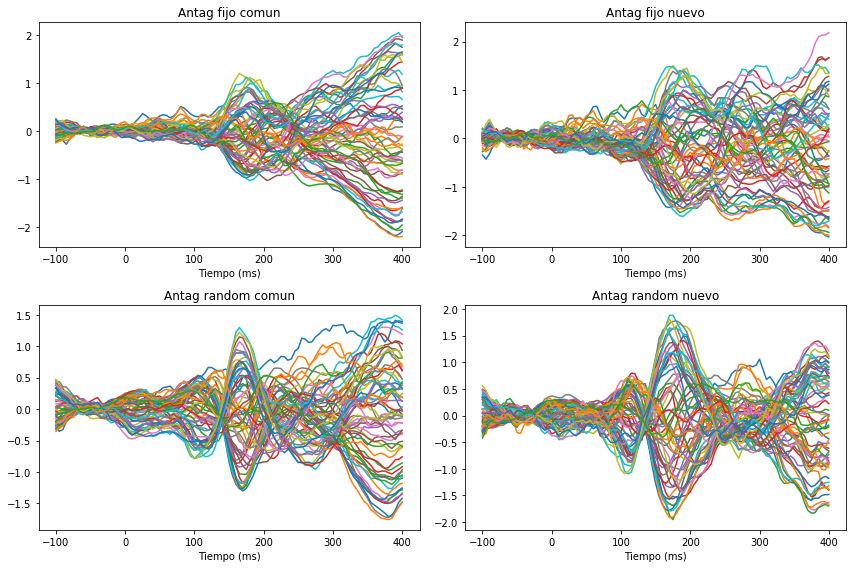

In [4]:
#Graficamos los datos para visualizar.
#Para eso iteramos sobre todos los datos
plt.figure(figsize=(12,8)) #Creamos un gráfico y le asignamos un tamaño
for ind, llave in enumerate(nombres):
    plt.subplot(2,2,ind+1)#Dividimos el gráfico en 2x2 subplots y a cada llave le asignamos uno
    plt.title(llave.replace('_',' ').capitalize()) #Damos un formato a los títutlos
    plt.plot(data['t'][0], data[llave].transpose()) #Hay que jugar un poco con los datos para pyplot
    plt.xlabel('Tiempo (ms)')
    plt.tight_layout() #Mejora la visualización
plt.show()
plt.close()

In [5]:
#Podemos revisar si las columnas están centradas    
#Enumerate hacer que al iterar sobre una lista también retorne los indices de los valores
#Recordando que python enumera desde el 0
for ind, columna in enumerate(data['antag_fijo_comun'].T[:5]): #Solo en cinco para revisar
    print('Columna %i de antag_fijo_comun' % (ind + 1))
    print('Media: %f' % np.average(columna))

Columna 1 de antag_fijo_comun
Media: 0.007977
Columna 2 de antag_fijo_comun
Media: 0.015314
Columna 3 de antag_fijo_comun
Media: 0.020132
Columna 4 de antag_fijo_comun
Media: 0.013814
Columna 5 de antag_fijo_comun
Media: 0.014600


In [6]:
#Centramos los datos para los analisis posteriores
for llave in nombres: #Iteramos en cada set de datos
    for ind, columna in enumerate(data[llave].T): #Iteramos sobre las columnas
        media = np.average(columna) #Sacamos la media de la columna
        data[llave][:,ind] -= media #Restamos la media a todos los valores de la columna
        
#Y podemos revisar        
for ind, columna in enumerate(data['antag_fijo_comun'].T[:5]): #Solo en cinco para revisar
    print('Columna %i de antag_fijo_comun' % (ind + 1))
    print('Media: %f' % np.average(columna))
    

Columna 1 de antag_fijo_comun
Media: 0.000000
Columna 2 de antag_fijo_comun
Media: 0.000000
Columna 3 de antag_fijo_comun
Media: -0.000000
Columna 4 de antag_fijo_comun
Media: -0.000000
Columna 5 de antag_fijo_comun
Media: 0.000000


In [7]:
#Para trabajar los datos necesitamos la matriz de covarianza, eso es tan simple como:
#C = np.cov(A)
#Pero iteramos para generarlos en un formato parecido a lo que teníamos
Cov = {} #Diccionario vacío
for llave in nombres: #Iteramos en los datos
    Cov[llave] = np.cov(data[llave]) #Guardamos la matriz de covarianza en el diccionario
Cov['antag_fijo_comun'] #Una muestra de las matrices de covarianza

array([[ 0.04470281,  0.02194677, -0.04044235, ...,  0.05707169,
         0.01621541, -0.04133099],
       [ 0.02194677,  0.0406077 ,  0.01645979, ..., -0.02714842,
         0.03054841,  0.00883432],
       [-0.04044235,  0.01645979,  0.16398926, ..., -0.19360926,
         0.02721959,  0.09504238],
       ...,
       [ 0.05707169, -0.02714842, -0.19360926, ...,  0.33754106,
        -0.0339794 , -0.21949028],
       [ 0.01621541,  0.03054841,  0.02721959, ..., -0.0339794 ,
         0.02757138,  0.01357205],
       [-0.04133099,  0.00883432,  0.09504238, ..., -0.21949028,
         0.01357205,  0.1842306 ]])

In [8]:
#Cabe mencionar que una de la funciones que trabajamos no se puede usar directamente en los datos
#Porque no son matrices cuadradas, en cambio la matriz de covarianza si
print('Dimensiones de la matriz de covarianza de \'antag_fijo_comun\': ',Cov['antag_fijo_comun'].shape)
#Podemos ver sus dimensiones

Dimensiones de la matriz de covarianza de 'antag_fijo_comun':  (63, 63)


### 1 EIG, SVD y PCA

Partimos aplicando la función EIG a la matriz de covarianza, esto debido a que requiere de funciones cuadradas, por definición.

In [9]:
### EIG tiene un equivalente en numpy, np.linalg.eig()
## eig() devuelve los valores propios y vectores propios de una matriz cuadrada
w, v = np.linalg.eig(Cov['antag_fijo_comun']) #guardamos los valores en w y los vectores en v
d = np.diag(w) # Guardamos los eigenvalues en una matriz diagonal
v_ = np.linalg.inv(v) #Guardamos el inverso de v para facilitar la lectura 

Para una matriz cuadrada A con valores propios $\lambda$ y vectores propios $\mathbf{v}$ tenemos que:
$$ A\mathbf{v} = \mathbf{v} \lambda $$

In [10]:
#Comprobamos
np.allclose(Cov['antag_fijo_comun'] @ v, v @ d, atol = 1e-15)
#Nota 1: El producto de matrices se denota @, no *
#Nota 2: Debido a los errores de floats, no se puede comparar realmente dos matrices de floats
#Sin embargo, np.allclose nos dice si todos los valores de dos matrices se acercan
#Dentro de un margen de error (por defecto tiene tolerancia [atol] de e-08)

True

Tener estos valores es muy útil ya que se puede reordenar la igualdad para tener:
$$ A = \mathbf{v} \lambda \mathbf{v}^{-1} $$
Lo que permite hacer operaciones más facilmente ya que solo hay que hacerlas en $\lambda$.
Por ejemplo tenemos que:
$$ A^n = \mathbf{v} \lambda^n \mathbf{v}^{-1}  $$
Lo cual permite calcular potencias de A con mucho menor costo computacional.

In [11]:
# A^2 comparado con v d^2 v^-1
np.allclose(Cov['antag_fijo_comun'] @ Cov['antag_fijo_comun'], v @ d**2 @ v_, atol = 1e-15)

True

SVD es una forma de análisis que descompone una matriz A en dos matrices unitarias (u y v) y una matriz diagonal ($\Sigma$) tal que:
$$ A = \textbf{u} \Sigma \textbf{v}$$
Esto es muy similar a la expresión anterior para los valores y vectores propios.

In [12]:
# Así como existe eig(), existe numpy.linalg.svd()
# SVD descompone una matriz en dos matrices unitarias (u y vh, para diferenciar del v anterior) y una diagonal (s)

u, s, vh = np.linalg.svd(Cov['antag_fijo_comun'])
# s es devuelto como un array de una dimension, pero np.diag() lo convierte a matriz diagonal
np.allclose(Cov['antag_fijo_comun'], u @ np.diag(s) @ vh, atol = 1e-15)

True

In [13]:
#No solo se parece el método, el valor de las diagonales es muy cercano
abs(s - w) < 1e-15

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [14]:
#Y también se pueden hacer operaciones como sacar potencias, solo llevando a cabo la operación en s
np.allclose(Cov['antag_fijo_comun'] @ Cov['antag_fijo_comun'], u @ np.diag(s**2) @ vh, atol = 1e-15)

True

Las similitudes entre los valores obtenidos por las funciones eig() y svd() se explican porque svd es una generalización a matrices rectangulares de eig (que está definido para matrices cuadradas).

Como es una generalización, se puede aplicar a los datos centrados en vez de a la covarianza.
Con los componentes obtenidos por SVD podemos determinar cuandos necesitamos para describir los datos.

In [15]:
u, s, vh = np.linalg.svd(data['antag_fijo_comun'])

SVD nos permite descomponer los datos y describirlos con pocas variables.
Graficamos como se ven usando las variables más importantes (que describen la mayor cantidad de datos con el menor error posible)

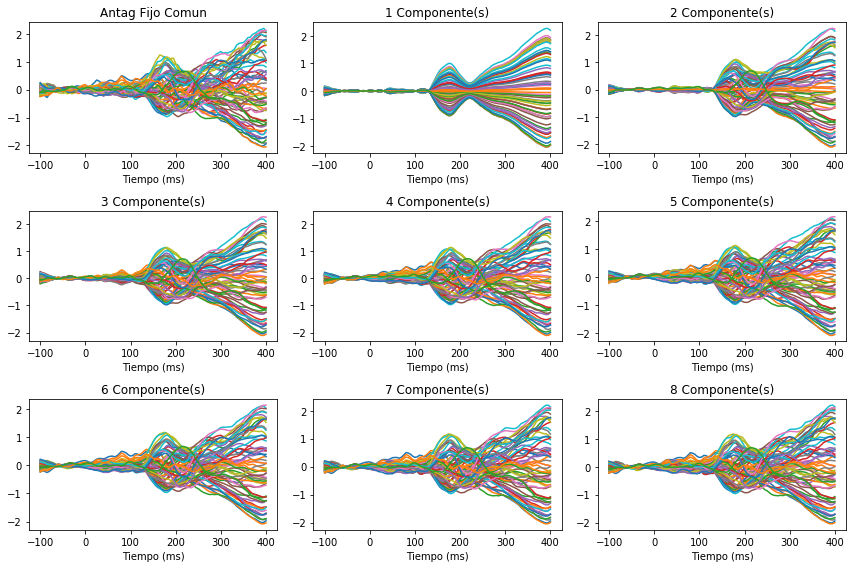

De un total de  63  componentes posibles.


In [16]:
componentes = 8 #Cuantos componentes vamos a probar/graficar
filas = np.ceil((componentes + 1)/3)
#El grafico es similar al usado para presentar los datos pero graficamos los datos aparte 
# de las descomposiciones
plt.figure(figsize=(12,8)) 
plt.subplot(filas,3,1)
plt.title('Antag Fijo Comun')
plt.plot(data['t'][0], data['antag_fijo_comun'].T)
plt.xlabel('Tiempo (ms)')

for i in range(componentes):
    plt.subplot(filas,3,i+2)
    # Seleccionamos todas las filas pero las columnas hasta la i [:,:i+1]
    # [:] selecciona todo y recordemos que python cuenta desde 0 pero no incluye el ultimo valor en un rango
    rc = u[:,:i+1] @ np.diag(s[:i+1]) @ vh[:i+1,:]
    plt.title('%i Componente(s)' % (i + 1))
    plt.plot(data['t'][0], rc.T)
    plt.xlabel('Tiempo (ms)')

plt.tight_layout() #Mejora la visualización
plt.show()
plt.close()

print('De un total de ',len(u[:]),' componentes posibles.')

Se puede ver que de un total de 63 componentes posibles, con tan solo uno se observa una parte importante del comportamiento, y apenas con 2 a 4 ya se ven la mayoría de las tendencias visibles de manera intuitiva.

PCA nos permite descomponer los datos en componentes principales, de manera semejante (y con cierta equivalencia matemática) 

In [17]:
#Python no viene con una función PCA pero usando funciones de numpy.linalg 
#es relativamente fácil de implementar. Este es un ejemplo que encontré en internet
#Código modificado de https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

def pca(X,k = 0): # k es el numero de componentes, k = 0 evalua todos los componentes
    # Data matrix X, assumes 0-centered
    n, m = X.shape
    assert np.allclose(X.mean(axis=0), np.zeros(m))
    # Compute covariance matrix
    C = np.dot(X.T, X) / (n-1)
    #C = np.cov(X)
    # Eigen decomposition
    eigen_vals, eigen_vecs = np.linalg.eig(C)
    # Project X onto PC space
    if k == 0:
        w = eigen_vecs
    else:
        w = eigen_vecs[:,:k]
    X_pca = np.dot(X, w)
    return X_pca

#Retorna los datos proyectados en cada vector propio de la matriz de covarianza

/home/mbarria/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


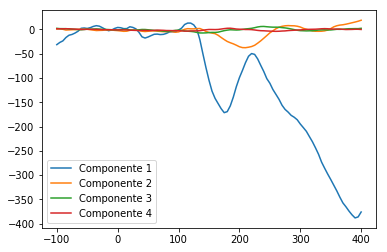

In [18]:
data_pca = pca(data['antag_fijo_comun'],4) #Calculamos los primeros 4 componentes principales
componentes = (data_pca.T @ data['antag_fijo_comun']) #Los proyectamos en los datos
#Graficamos la evolución de los componentes para "antag fijo comun"
for indice, fila in enumerate(componentes): #Enumerate permite guardar el indice en una iteracion
    plt.plot(data['t'][0], fila, label = 'Componente %i' % (indice + 1)) #Graficamos cada fila asignandole su indice
plt.legend()
plt.show()
plt.close()

Podemos ver claramente que el componente que más varia y describe los datos es el primero, con algunos cambios vistos también en el segundo.

### 2 PCA

Graficamos entonces los primeros dos componentes para todos los datos.

/home/mbarria/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


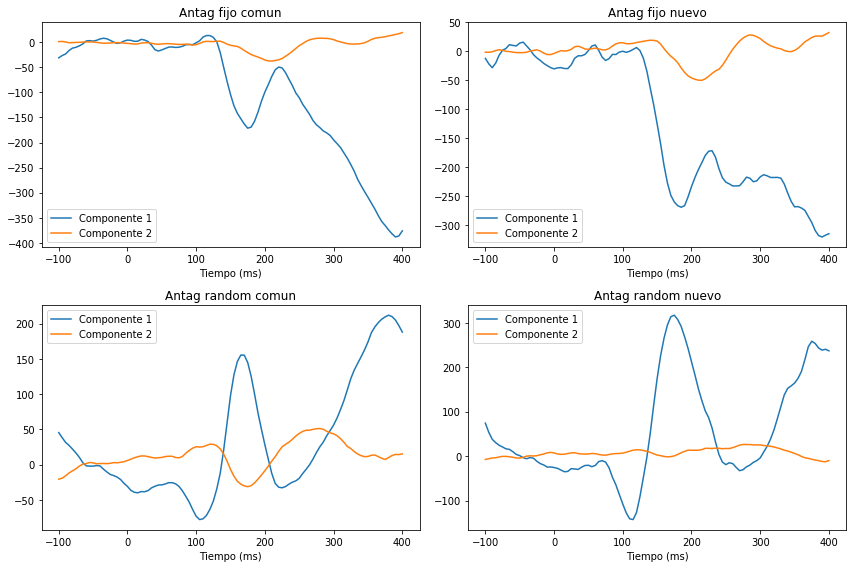

In [19]:
plt.figure(figsize=(12,8)) #Creamos un gráfico y le asignamos un tamaño
for ind, llave in enumerate(nombres):
    plt.subplot(2,2,ind+1)#Dividimos el gráfico en 2x2 subplots y a cada llave le asignamos uno
    plt.title(llave.replace('_',' ').capitalize()) #Damos un formato a los títutlos
    data_pca = pca(data[llave],2) # Dos componentes principales
    componentes = (data_pca.T @ data[llave])
    for indice, fila in enumerate(componentes): #Enumerate permite guardar el indice en una iteracion
        plt.plot(data['t'][0], fila, label = 'Componente %i' % (indice + 1)) #Graficamos cada fila asignandole su indice
    plt.legend()
    plt.xlabel('Tiempo (ms)')
    plt.tight_layout() #Mejora la visualización
plt.show()
plt.close()

Podemos ver claramente similitudes y diferencias entre los datos basados en los componentes, pero para facilitar la categorización los graficamos por el primer componente en vez de por set de datos.
También ignoramos el segundo componente pues todos son bastante parecidos y no parece haber una tendencia clara.

/home/mbarria/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


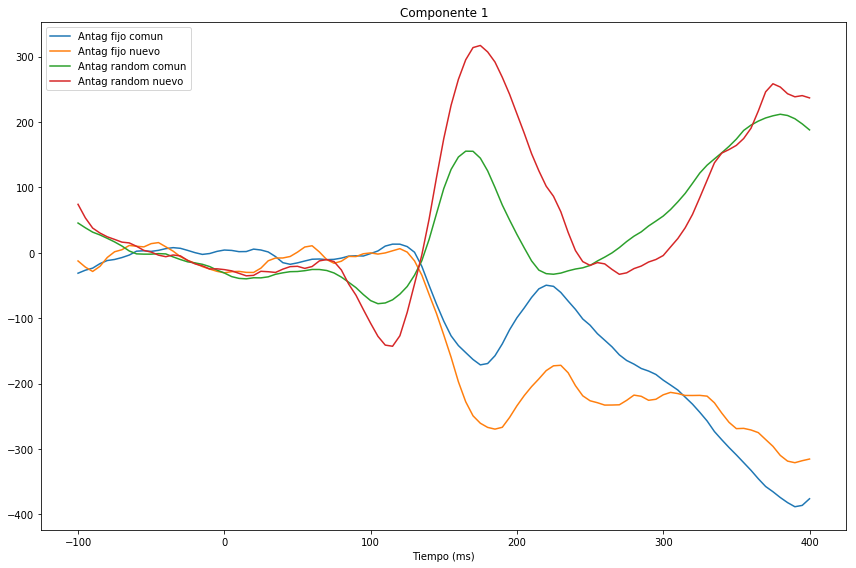

In [20]:
plt.figure(figsize=(12,8)) #Creamos un gráfico y le asignamos un tamaño
plt.title('Componente 1')
for llave in nombres:
    etiqueta = llave.replace('_',' ').capitalize()
    data_pca = pca(data[llave], 1) 
    componente = (data_pca.T @ data[llave])
    plt.plot(data['t'][0], componente.T, label = etiqueta) #Graficamos cada fila asignandole su indice
plt.legend()
plt.xlabel('Tiempo (ms)')
plt.tight_layout() #Mejora la visualización
plt.show()
plt.close()

Podemos ver que todas las curvas son algo parecidas, si bien desplazadas las aleatorias respecto a las fijas.
Vemos también más variación en los componentes de las curvas aleatorias, con una mayor diferencia entre el máximo y el minimo respecto a las fijas.

Respecto a los datos comunes o nuevos, vemos que los comunes son curvas con menos variación, se ve como si tuvieran menos ruido.